In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score, plot_confusion_matrix,plot_roc_curve
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [2]:
tweets=pd.read_csv("JWC_alltweets1_labeled.csv")

In [3]:
tweets

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Label,Clean Tweet
0,2021-05-19 03:03:23+00:00,1.390000e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,5/19/21,-0.4648,5,S,water issues in the city again smh jacksonwate...
1,2021-04-24 02:14:03+00:00,1.390000e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,4/24/21,0.0000,4,N,jacksonwatercrisis
2,2021-04-21 12:26:37+00:00,1.380000e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,4/21/21,0.3400,4,N,anyone with mobile video of the jacksonwatercr...
3,2021-04-07 21:13:26+00:00,1.380000e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,4/7/21,0.0000,4,N,flintwatercrisis jacksonwatercrisis
4,2021-03-22 23:57:03+00:00,1.370000e+18,Jackson Mississippi's Water Crisis is Rooted i...,ru2inept,The Twilight Zone,0,3,0,0,3/22/21,-0.8481,3,R,jackson mississippi s water crisis is rooted i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,2021-03-02 21:29:35+00:00,1.370000e+18,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,3/2/21,0.5413,3,L,governor we ll have to have a serious conversa...
2626,2021-02-28 17:40:09+00:00,1.370000e+18,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2/28/21,-0.2124,2,L,hindseoc you nincompoops should fix the broke...
2627,2021-02-25 00:17:15+00:00,1.360000e+18,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2/25/21,0.3584,2,N,kaylahazel our north been complaining about w...
2628,2021-02-24 13:52:51+00:00,1.360000e+18,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2/24/21,-0.0258,2,N,jordanrhillman exactly he ll take credit for ...


In [4]:
#Changing the labels s-S, l to L
tweets['Label']=tweets['Label'].replace({'s':'S',"l":"L"})

In [5]:
#Lables- Infrastructure(I), Legislature(L), Struggle(S), Racism(R)

tweets['Label'].value_counts()

N    918
S    717
L    373
R    313
I    309
Name: Label, dtype: int64

In [6]:
#Removing tweets with Label-N
tweets=tweets[tweets['Label']!='N']

<AxesSubplot:xlabel='Label', ylabel='count'>

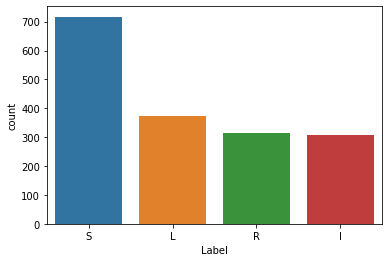

In [7]:
sns.countplot(x='Label',data=tweets,order =tweets['Label'].value_counts().index)

In [8]:
#Word cloud for each label
tweets_S=tweets[tweets['Label']=='S']
tweets_L=tweets[tweets['Label']=='L']
tweets_R=tweets[tweets['Label']=='R']
tweets_I=tweets[tweets['Label']=='I']

In [9]:
#Function for wordcloud

def wordcloud(df):
    
    text = " ".join(word for word in df['Clean Tweet'])
    print ("There are {} words in the combination of all articles".format(len(text)))

    stopwords = set(STOPWORDS)
    stopwords.update(["https",'t','co','amp','s','M','water','city','Jackson','Mississippi','state'])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    

There are 111055 words in the combination of all articles


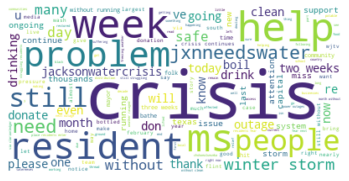

In [10]:
wordcloud(tweets_S)

There are 68120 words in the combination of all articles


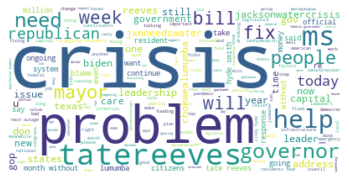

In [11]:
wordcloud(tweets_L)

There are 59746 words in the combination of all articles


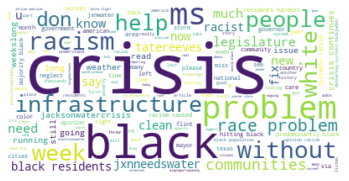

In [12]:
wordcloud(tweets_R)

There are 61117 words in the combination of all articles


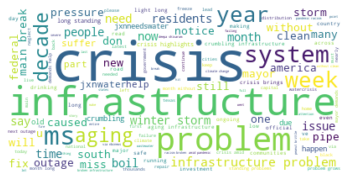

In [22]:
wordcloud(tweets_I)

In [28]:
#Function for common words
def remove_stopwords(x):
    stopword=stopwords.words('english')
    stopword.append("amp")
    stopword.append("t")
    stopword.append("co")
    stopword.append("ms")
    return [y for y in x if y not in stopword]

def common_words(df):
  
    df['word list']=df['Clean Tweet'].apply(lambda x:str(x).split())
    df['word list']=df['word list'].apply(lambda x:remove_stopwords(x))
    
    top = Counter([item for sublist in df['word list'] for item in sublist])
    df_common = pd.DataFrame(top.most_common(10))
    df_common.columns = ['Common words','count']
    print(df_common['Common words'].to_list())
#     tweet_positive.style.background_gradient(cmap='Greens')
    #return df_common
    fig = px.bar(df_common, x="count", y="Common words", title='Most Commmon Words in Tweets', orientation='h', 
             width=700, height=700,color='Common words')
    fig.show()

In [29]:
common_words(tweets_S)

<ipython-input-28-8f59cc69007a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['water', 'jackson', 'crisis', 'mississippi', 'residents', 'city', 'still', 'weeks', 'help', 'without']


<ipython-input-28-8f59cc69007a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
common_words(tweets_L)

<ipython-input-28-8f59cc69007a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['water', 'jackson', 'crisis', 'mississippi', 'state', 'city', 'tatereeves', 'problem', 'help', 'problems']


<ipython-input-28-8f59cc69007a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
common_words(tweets_R)

<ipython-input-28-8f59cc69007a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-8f59cc69007a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['water', 'jackson', 'crisis', 'mississippi', 'black', 'racism', 'city', 'problem', 'state', 'residents']


In [32]:
common_words(tweets_I)

<ipython-input-28-8f59cc69007a>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-8f59cc69007a>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['water', 'jackson', 'infrastructure', 'crisis', 'mississippi', 'city', 'problems', 'problem', 'month', 'long']


In [36]:
type(tweets['Datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [45]:
#7/22

tweets['Datetime']=pd.to_datetime(tweets['Datetime'])

tweets_S['Datetime']=pd.to_datetime(tweets_S['Datetime'])
tweets_L['Datetime']=pd.to_datetime(tweets_L['Datetime'])
tweets_R['Datetime']=pd.to_datetime(tweets_R['Datetime'])
tweets_I['Datetime']=pd.to_datetime(tweets_I['Datetime'])
tweets_I

<ipython-input-45-6249300b02f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-6249300b02f0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-6249300b02f0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-45-6249300

,Datetime,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Month,Label,Clean Tweet,word list
18,2021-03-13 20:39:05+00:00,1.370000e+18,#JacksonWaterCrisis M I S S I S S I P P I\n\nN...,Backstorymom1,NaN,0,1,0,0,3/13/21,-0.8625,3,I,jacksonwatercrisis m i s s i s s i p p i next...,"[jacksonwatercrisis, p, p, next, time, worse, ..."
27,2021-03-09 21:25:00+00:00,1.370000e+18,Mississippi Water Crisis Highlights Infrastruc...,Civilgeo,"Wisconsin, USA",0,1,0,2,3/9/21,-0.8126,3,I,mississippi water crisis highlights infrastruc...,"[mississippi, water, crisis, highlights, infra..."
48,2021-03-04 02:52:10+00:00,1.370000e+18,"Jackson, Mississippi #watercrisis rages on. Sp...",MXLDET,detroit mi,0,0,0,0,3/4/21,0.0258,3,I,jackson mississippi watercrisis rages on speak...,"[jackson, mississippi, watercrisis, rages, spe..."
50,2021-03-04 02:48:26+00:00,1.370000e+18,#maddow \n\nInfrastructure and utilities in th...,Informed_Un,Earth,0,0,0,0,3/4/21,-0.7840,3,I,maddow infrastructure and utilities in the co...,"[maddow, infrastructure, utilities, country, s..."
68,2021-03-03 15:26:20+00:00,1.370000e+18,"#JacksonWaterCrisis\n\nJackson, Mississippi, w...",Backstorymom1,NaN,0,0,1,0,3/3/21,-0.7783,3,I,jacksonwatercrisis jackson mississippi water ...,"[jacksonwatercrisis, jackson, mississippi, wat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2021-03-02 01:06:32+00:00,1.370000e+18,#MississippiWaterTateReevesJacksonMississippiC...,buddhabookclub,"Somerset, United Kingdom",0,0,0,0,3/2/21,-0.8779,3,I,mississippiwatertatereevesjacksonmississippic...,[mississippiwatertatereevesjacksonmississippic...
2595,2021-03-01 17:48:05+00:00,1.370000e+18,Water crisis in Mississippi. Instead of dickin...,tech_52,United States,0,2,2,0,3/1/21,-0.6249,3,I,water crisis in mississippi instead of dicking...,"[water, crisis, mississippi, instead, dicking,..."
2604,2021-02-24 20:57:37+00:00,1.360000e+18,The governor of Mississippi said he's dispatch...,HomesForHeroes,United States,0,1,0,0,2/24/21,-0.6124,2,I,the governor of mississippi said he s dispatch...,"[governor, mississippi, said, dispatching, nat..."
2611,2021-05-25 12:00:01+00:00,1.400000e+18,There's not even safe rivers in #Jackson \nWe ...,smartstatistic,"Jackson, MS",1,8,15,0,5/25/21,-0.7511,5,I,there s not even safe rivers in jackson we are...,"[even, safe, rivers, jackson, truly, watercris..."


In [83]:
#User-defined function for Scatter plot of sentiment score by tweet labels along time
def scatterplot_sentimentScore(df):
    sns.scatterplot(df['Datetime'],df['compound'], data=df,hue=df['Label']).set_title('Compound sentiment scores of tweets by  tweet topics over time')
    plt.xticks(rotation=90)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



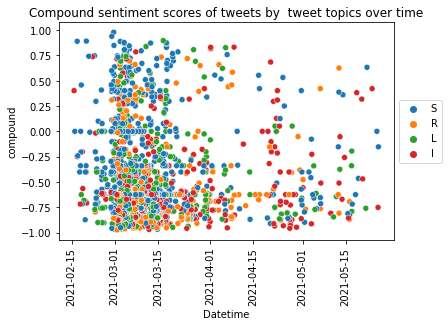

In [84]:
#Scatter plot of sentiment score by tweet labels along time
scatterplot_sentimentScore(tweets)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



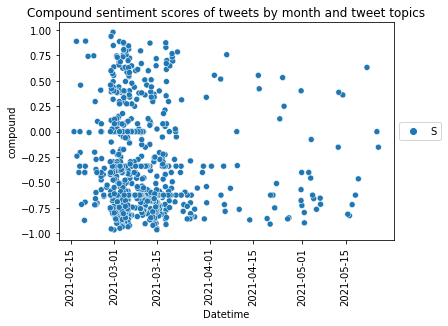

In [68]:
scatterplot_sentimentScore(tweets_S)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



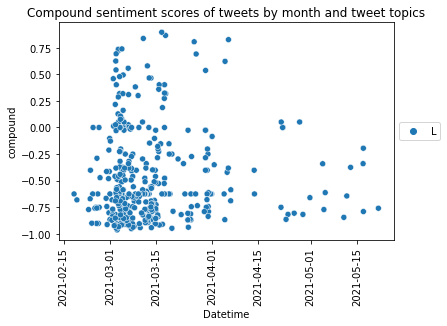

In [69]:
scatterplot_sentimentScore(tweets_L)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



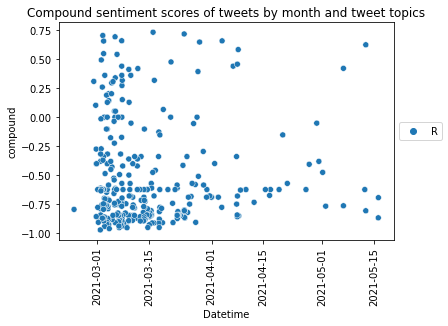

In [70]:
scatterplot_sentimentScore(tweets_R)

C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



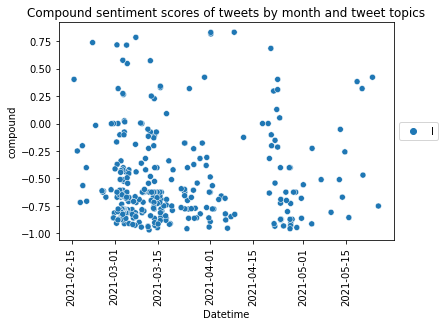

In [71]:
scatterplot_sentimentScore(tweets_I)

In [34]:
news_data=pd.read_csv("newsData/news_data_sentimentScore.csv")
news_data=news_data.rename(columns={'DateTime':'Datetime'})
news_data

,Unnamed: 0,Unnamed: 0.1,Date,Media,Title,Article,Summary,Keyword,compound,Datetime,Year-Month
0,0,0,2-Mar-21,NBC News,"Jackson, Mississippi, water crisis brings to l...",After more than two weeks without clean runnin...,Residents have been lining up at several sites...,Jackson Mississippi water crisis,-0.1189,2021-03-02 00:00:00,2021-03
1,1,1,2-Mar-21,CNN,"In Jackson, Mississippi, some residents have b...","(CNN) Many residents of Jackson, Mississippi, ...","(CNN) Many residents of Jackson, Mississippi, ...",Jackson Mississippi water crisis,-0.0756,2021-03-02 00:00:00,2021-03
2,2,2,3-Mar-21,USA Today,"Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...",Jackson Mississippi water crisis,-0.2175,2021-03-03 00:00:00,2021-03
3,3,3,15-Mar-21,Slate,Ignore Mississippi’s Water Crisis at Your Own ...,"For four weeks now, thousands of residents of ...","Water mains were damaged, reservoirs froze, an...",Jackson Mississippi water crisis,-0.1861,2021-03-15 00:00:00,2021-03
4,4,4,"th · Mar 22, 2021",The New York Times,‘You Can’t Bathe. You Can’t Wash.’ Water Crisi...,Mr. Reeves called in the National Guard last m...,Mr. Reeves called in the National Guard last m...,Jackson Mississippi water crisis,0.2531,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
219,219,43,2021-03-04 06:25:16+00:00,Our Daily Planet,"Jackson, MS is Struggling With a Water Crisis,...","by Amy Lupica, ODP Staff Writer\n\nWhile all e...","by Amy Lupica, ODP Staff WriterWhile all eyes ...",NaN,-0.3991,2021-03-04 06:25:16+00:00,2021-03
220,220,44,2021-02-19 22:33:00+03:00,Daily Sabah,US cities slammed by storms face new crisis: W...,States slammed by winter storms that left mill...,States slammed by winter storms that left mill...,NaN,-0.1793,2021-02-19 22:33:00+03:00,2021-02
221,221,0,3-Mar-21,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis,0.0222,2021-03-03 00:00:00,2021-03
222,222,5,2021-03-02 01:54:57+00:00,Mississippi Free Press,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis,-0.0023,2021-03-02 01:54:57+00:00,2021-03


C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Compound sentiment scores of news articles along the time')

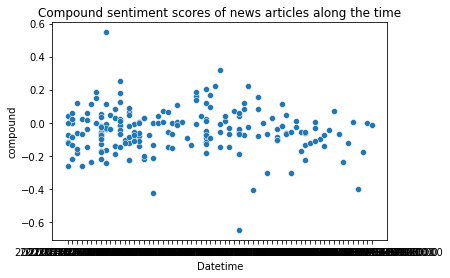

In [36]:
#Scatterplot for 

sns.scatterplot(news_data['Datetime'],news_data['compound'], data=news_data).set_title('Compound sentiment scores of news articles along the time')


In [86]:
news_data['Type']="news"

tweets_score=pd.read_csv("JWC_alltweets_sentimentScore.csv") #Reading original tweet file for getting compound scores
tweets_score['Type']="tweets"
tweets_score



,Datetime,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Type
0,2021-05-19 03:03:23+00:00,0,0,1394851147563872264,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0,0,0,0,2021-05-19,-0.4648,tweets
1,2021-04-24 02:14:03+00:00,1,1,1385779037126148096,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0,0,0,0,2021-04-24,0.0000,tweets
2,2021-04-21 12:26:37+00:00,2,2,1384846032329138176,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0,0,0,0,2021-04-21,0.3400,tweets
3,2021-04-07 21:13:26+00:00,3,3,1379905176711073792,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0,0,0,0,2021-04-07,0.0000,tweets
4,2021-03-24 17:19:22+00:00,4,4,1374772843678949382,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0,0,0,0,2021-03-24,0.0000,tweets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,2021-03-02 21:29:35+00:00,13,13,1366863278396346369,Governor: We’ll have to have a serious convers...,keeganfoxx,"Jackson, MS",0,1,1,0,2021-03-02,0.5413,tweets
4001,2021-02-28 17:40:09+00:00,14,14,1366080764719333376,@HindsEOC You nincompoops should fix the broke...,AlanBuckles,NaN,0,0,0,0,2021-02-28,-0.2124,tweets
4002,2021-02-25 00:17:15+00:00,15,15,1364731148602134528,@kaylahazel_ our north been complaining about ...,GaredQuinn,"Jackson, MS",0,0,0,0,2021-02-25,0.3584,tweets
4003,2021-02-24 13:52:51+00:00,16,16,1364574012282728449,@jordanrhillman Exactly. He’ll take credit for...,FBrownWilliams,"Jackson, MS",0,0,0,0,2021-02-24,-0.0258,tweets


In [88]:
#Scatterplot of Compound sentiment scores of tweets over time
# sns.scatterplot(tweets_score['Date'],tweets_score['compound'], data=tweets_score).set_title('Compound sentiment scores of tweets over time')
# plt.xticks(rotation=90)
# # for ind, label in enumerate(plt.get_xticklabels()):
# #     if ind % 10 == 0:  # every 10th label is kept
# #         label.set_visible(True)
# #     else:
# #         label.set_visible(False)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [78]:
print(tweets['compound'].mean())
tweets_score['compound'].mean()

-0.4304378504672898


-0.49743253433208495

In [89]:
frames=[tweets_score,news_data]
df=pd.concat(frames)
df

,Datetime,Unnamed: 0,Unnamed: 0.1,Tweet Id,Text,Username,User Location,Reply Count,Retweet Count,Like Count,Quote Count,Date,compound,Type,Media,Title,Article,Summary,Keyword,Year-Month
0,2021-05-19 03:03:23+00:00,0,0,1.394851e+18,Water issues in the city again? SMH\n\n#Jacks...,FNULNU1,NaN,0.0,0.0,0.0,0.0,2021-05-19,-0.4648,tweets,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-24 02:14:03+00:00,1,1,1.385779e+18,#JacksonWaterCrisis https://t.co/OFuCz2zYa9,Backstorymom1,NaN,0.0,0.0,0.0,0.0,2021-04-24,0.0000,tweets,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-21 12:26:37+00:00,2,2,1.384846e+18,Anyone with mobile video of the #jacksonwaterc...,nicolahann,"New York, NY",0.0,0.0,0.0,0.0,2021-04-21,0.3400,tweets,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-07 21:13:26+00:00,3,3,1.379905e+18,#FlintWaterCrisis #JacksonWaterCrisis https://...,JalenRoseBat,Imported from Detroit,0.0,0.0,0.0,0.0,2021-04-07,0.0000,tweets,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-24 17:19:22+00:00,4,4,1.374773e+18,#JacksonWaterCrisis https://t.co/Wi1VABjXs2,Backstorymom1,NaN,0.0,0.0,0.0,0.0,2021-03-24,0.0000,tweets,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2021-03-04 06:25:16+00:00,219,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-04 06:25:16+00:00,-0.3991,news,Our Daily Planet,"Jackson, MS is Struggling With a Water Crisis,...","by Amy Lupica, ODP Staff Writer\n\nWhile all e...","by Amy Lupica, ODP Staff WriterWhile all eyes ...",NaN,2021-03
220,2021-02-19 22:33:00+03:00,220,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-19 22:33:00+03:00,-0.1793,news,Daily Sabah,US cities slammed by storms face new crisis: W...,States slammed by winter storms that left mill...,States slammed by winter storms that left mill...,NaN,2021-02
221,2021-03-03 00:00:00,221,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3-Mar-21,0.0222,news,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis,2021-03
222,2021-03-02 01:54:57+00:00,222,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-02 01:54:57+00:00,-0.0023,news,Mississippi Free Press,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis,2021-03


In [90]:
#Scatterplot of sentiment score of news and tweets over time

# sns.scatterplot(df['Datetime'],df['compound'], data=df,hue=df['Type']).set_title('Scatterplot of sentiment score of news and tweets over time')
# plt.xticks(rotation=90)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


[-0.33176066945606697, -0.5200162939297124, -0.4688072386058982, -0.5223527508090614]


Text(0.5, 1.0, 'Sentiment scores of different labels')

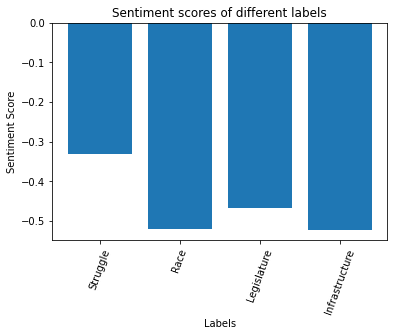

In [107]:
#Comparison of sentiment score of different labels
s=tweets_S['compound'].mean()
r=tweets_R['compound'].mean()
l=tweets_L['compound'].mean()
i=tweets_I['compound'].mean()
scores=[s,r,l,i]
labels=['Struggle', 'Race', 'Legislature', 'Infrastructure']
print(scores)

plt.bar(labels,scores)
plt.xticks(labels, rotation=70)
plt.ylabel('Sentiment Score')
plt.xlabel('Labels')
plt.title('Sentiment scores of different labels')

In [ ]:
#Scatter plot of all labels by week
#Difference in sentiment score of each category
#Think what you can do other weekly analysis

In [ ]:
## Machine Learning Models

In [21]:
#Encoding labels
def encode_labels(x):
    if x=="S":
        return 0
    elif x=="L":
        return 1
    elif x=="R":
        return 2
    elif x=="I":
        return 3
tweets['EncodedLabel']=tweets['Label'].apply(encode_labels)

<ipython-input-21-0485e54d968b>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
train,test = train_test_split(tweets,test_size=0.2,random_state=42)

In [23]:
train['EncodedLabel'].value_counts()

0    572
1    300
2    252
3    245
Name: EncodedLabel, dtype: int64

In [24]:

train_tweet=[]
for tweet in train['Clean Tweet']:
    train_tweet.append(tweet)
test_tweet=[]
for tweet in test['Clean Tweet']:
    test_tweet.append(tweet)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_tweet)
test_features=v.transform(test_tweet)


In [26]:
pd.DataFrame(train_features.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(train_tweet))],
            columns=v.get_feature_names())

,aaron,ab,abandoned,abate,abbott,abc,ability,able,about,above,...,yourselves,youth,youtube,yr,yrs,zero,zerohedge,zombaekillz,zoom,zowie
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 1365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 1366,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
sentence 1367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 1368,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:

MLclassifiers = [
    
    KNeighborsClassifier(5),
   
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of KNeighborsClassifier is 0.5335276967930029
Classification Report of KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.53      0.92      0.67       145
           1       0.48      0.18      0.26        73
           2       0.46      0.28      0.35        61
           3       0.71      0.31      0.43        64

    accuracy                           0.53       343
   macro avg       0.55      0.42      0.43       343
weighted avg       0.54      0.53      0.48       343

Confusion matrix : 
[[133   5   6   1]
 [ 53  13   5   2]
 [ 31   8  17   5]
 [ 34   1   9  20]]



Accuracy of DecisionTreeClassifier is 0.6938775510204082
Classification Report of DecisionTreeClassifier
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       145
           1       0.59      0.53      0.56        73
           2       0.84      0.69      0.76        61
           3       0.62      0.70      0

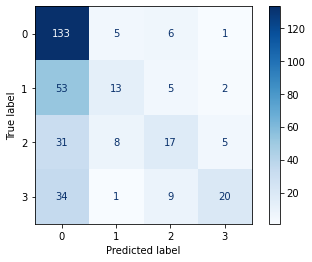

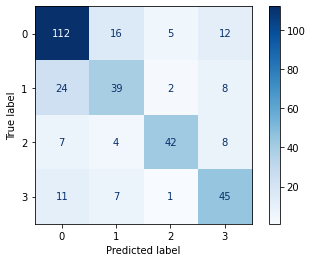

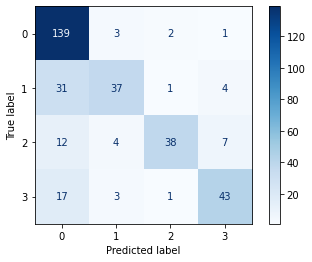

In [28]:
accuracy_scores=[]
models=[]

for classifier in MLclassifiers:
    #Using sparse and dense matrix to train and test
    clf = classifier.fit(train_features,train['EncodedLabel'])
    pred = clf.predict(test_features)

        
    accuracy = accuracy_score(test['EncodedLabel'], pred)
    accuracy_scores.append(accuracy)
    models.append(classifier.__class__.__name__)
    
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  
   
    print('Classification Report of '+classifier.__class__.__name__+"\n",classification_report(test['EncodedLabel'], pred))
    
    #printing accuracy scores, confusion matrix, ROC_AUC, plotting ROC curve and confusion matrix for all the developed models and tested on test set
   
    print('Confusion matrix : \n{}'.format(confusion_matrix(test['EncodedLabel'],pred)))
    plot_confusion_matrix(clf, test_features, test['EncodedLabel'],cmap=plt.cm.Blues)
#         roc_auc = roc_auc_score(test['Sentiment'], pred)
#         print("ROC_AUC = {}".format(roc_auc))   
#         plot_roc_curve(clf, test_features, test['Sentiment'])
#     except:
#         print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
#         plot_confusion_matrix(clf, dense_test, test['Sentiment'],cmap=plt.cm.Blues)
#         roc_auc = roc_auc_score(test['Sentiment'], pred)
#         print("ROC_AUC = {}".format(roc_auc))   
#         plot_roc_curve(clf, dense_test, test['Sentiment'])
    print("\n\n")

Text(0.5, 1.0, 'Accuracy scores of Models')

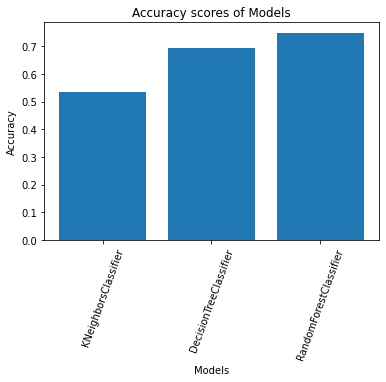

In [30]:
#Random forest performs great in prediction

plt.bar(models,accuracy_scores)
plt.xticks(models, rotation=70)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy scores of Models')

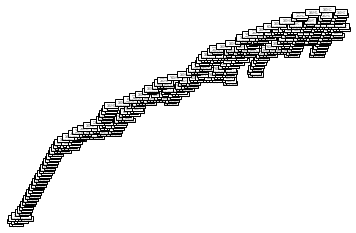

In [32]:
#Visualizing tree
from sklearn import tree

clf= DecisionTreeClassifier()
clf.fit(train_features,train['EncodedLabel'])

tree.plot_tree(clf);


In [19]:
#Select some sample tweets for each category to showcase as "typical"